# Data

In [53]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [54]:
def to_float(data):
    for x in data:
        for i in range(len(data[0])):
            x[i] = float(x[i])
    return data

In [55]:
train1 = []
train1_labels = []
with open("concrete/train.csv", "r") as f:
    for line in f:
        item = line.strip().split(",")
        train1.append(item[:-1])
        train1_labels.append(item[-1])
        
train2 = to_float(train1)
train2_labels = to_float([train1_labels])[0]

for i in range(len(train1)):
    train2[i].insert(0,1)


test1 = []
test1_labels = []
with open("concrete/test.csv", "r") as f:
    for line in f:
        item = line.strip().split(",")
        test1.append(item[:-1])
        test1_labels.append(item[-1])
        
test2 = to_float(test1)
test2_labels = to_float([test1_labels])[0]

for i in range(len(test2)):
    test2[i].insert(0,1)

In [56]:
for i in range(len(train2)):
    train2[i] = np.array(train2[i])
train = np.array(train2)
train_labels = np.array(train2_labels)



for i in range(len(test2)):
    test2[i] = np.array(test2[i])
test = np.array(test2)

test_labels = np.array(test2_labels)

In [57]:
m = len(train)
n = len(test)
k = len(train[0])

# Gradient Descent

In [58]:
def norm(X, Y):
    summ = 0
    for i in range(0,len(X)):
        summ = summ + (X[i]-Y[i])**2
    Norm= sqrt(summ)
    return Norm

In [59]:
def J(data, labels, W):
    J = 0.5 * sum([(labels[i]- np.dot(data[i], W))**2 for i in range(len(data))])
    return J

In [60]:
def gradient(data, labels, W):
    g_J = [0] * len(data[0])
    for j in range(len(data[0])):
        for i in range(m):
            g_J[j] = g_J[j] - (labels[i]- np.dot(data[i], W)) * data[i][j]
    return g_J

In [61]:
def LMS_gradient(data, labels, W, r, epn):
    error_list = []
    
    while norm(gradient(data, labels, W), [0]*8) >= epn/r:
        error_list.append(J(data, labels, W))
        
        W = W - r * np.array(gradient(data, labels, W))
        
    return(error_list, W)

In [62]:
data = train
labels = train_labels

r = 0.014
epn = 1e-6
W = np.zeros(8)

error_list, W = LMS_gradient(train, train_labels, W, r, epn)

In [63]:
print(error_list[-1])
print(W)
print(len(error_list))

14.981943679739334
[-0.01520163  0.9003219   0.78604328  0.85077298  1.29870037  0.12985012
  1.57192298  0.99844599]
5279


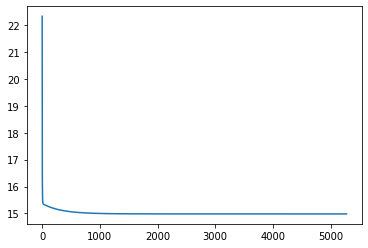

In [64]:
plt.plot(error_list)
plt.show()

In [65]:
print("Cost of test data = ", J(test, test_labels, W))

Cost of test data =  23.361436319750908


# Stochastic Gradient Descent

In [83]:
def Stochastic_Gradient(X, y, W):
    S_G = [0] * len(X)
    for j in range(len(X)):
            S_G[j] = (y - np.dot(X, W)) * X[j]
    return S_G

In [84]:
def LMS_Stochastic_Gradient(data, labels, W, r, epn, N): 
    error_list = []
    for i in range(N):
        p = np.random.permutation(m)
        
        a = 0
        error = []
        for i in p:
            if norm(Stochastic_Gradient(data[p[i]], labels[p[i]], W), np.zeros(8)) <= epn:
                a = 1
                return(error, W, a)
            error.append(J(data, labels, W))
            W = W + r * np.array(Stochastic_Gradient(data[p[i]], labels[p[i]], W))
        
        if a == 1:
            return(error_list, W)
        error_list = error_list + error
    return(error_list, W)

In [85]:
W = np.zeros(8)
epn = 1e-6
r = 0.002
N = 15000
data = train
labels = train_labels

error_list, W_final = LMS_Stochastic_Gradient(data, labels, W, r, epn, N) 

print(W_final)
print(J(data, labels, W_final))
print(J(test, test_labels, W_final))

[-0.01524814  0.86895559  0.75320781  0.8138198   1.2722928   0.12502882
  1.52989763  0.96776993]
14.982545984553136
23.32084724541653


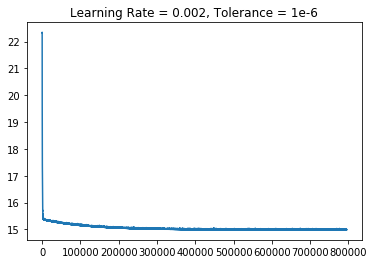

In [86]:
plt.plot(error_list)
plt.title('Learning Rate = 0.002, Tolerance = 1e-6')
plt.show()

In [87]:
len(error_list)

795000

# Analytical Method and Comparing Results

In [68]:
X = train.T
Q = np.linalg.inv(X.dot(X.T))
P = Q.dot(X)
W_min = P.dot(train_labels)
W_min

array([-0.01519667,  0.90056451,  0.78629331,  0.85104314,  1.29889413,
        0.12989067,  1.57224887,  0.99869359])

In [69]:
print("Weight vector for Stochastic Gradient Descent =") 
W_final

Weight vector for Stochastic Gradient Descent =


array([-0.01656469,  0.86777169,  0.75181352,  0.81410938,  1.27388667,
        0.1254294 ,  1.52788089,  0.96869219])

In [70]:
W_grad = np.array([-0.01520362,  0.90022499,  0.78594341,  0.85066508,  1.29862298,  0.12983393, 
          1.5717928,   0.99834709])

print("Weight vector for Gradient Descent =") 
W_grad

Weight vector for Gradient Descent =


array([-0.01520362,  0.90022499,  0.78594341,  0.85066508,  1.29862298,
        0.12983393,  1.5717928 ,  0.99834709])

In [71]:
norm (W_final / norm(W_final, np.zeros(8)), W_min / norm(W_min, np.zeros(8)))

0.008416070066266499

In [72]:
norm (W_grad / norm(W_grad, np.zeros(8)), W_min / norm(W_min, np.zeros(8)))

8.063467498835986e-05